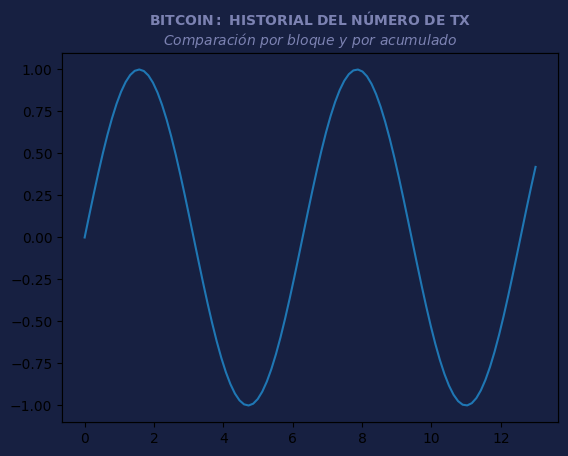

In [11]:
#librerias 


#usar comandos del sistema
import os
#manejo numerico
import numpy as np
#graficar
import matplotlib.pyplot as plt
#libreria manejo de tipografia
from matplotlib import font_manager as fm, rcParams

#cambiar la typografia
fpath = os.path.join(r'MonoLisaSimpson-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]



# Estilos: ESTAS VARIABLES CONTIENEN ESTILOS
estilo_dark=[(124/255., 130/255., 178/255.), (23/255., 32/255., 65/255.), (23/255., 32/255., 65/255.),] 
# BLANCO , AZUL OSCURO , AZULOSCURO
estilo_dark2=[(237/255., 237/255., 237/255.), (64/255., 64/255., 64/255.), (64/255., 64/255., 64/255.),] 
# BLANCO , NEGRO , NEGRO
estilo_dark3=[(253/255., 253/255., 253/255.), (44/255., 44/255., 44/255.), (254/255., 254/255., 244/255.),] 
# BLANCO , NEGRO , BLANCO
estilo_blanco=[(58/255., 53/255., 59/255.), (255/255., 255/255., 255/255.), (255/255., 255/255., 255/255.),] 
# NEGRO, BLANCO , BLANCO
estilo_blanco2=[(80/255., 82/255., 81/255.), (255/255., 255/255., 255/255.), (255/255., 255/255., 255/255.),]
# NEGRO , BLANCO, BLANCO


#Estilos=[estilo_dark,estilo_blanco]
Estilos=[estilo_dark,estilo_dark2,estilo_dark3,estilo_blanco,estilo_blanco2]

# se tienen variables que contienen los colores del formato
# estilo[0]= Titulos y letras 
# estilo[1] = Fondo principal
# estilo[2] = Fondo imagen




# colores: ESTA VARIABLE CONTIENE COLORES
colores = [(141, 211, 199),(254, 255, 179),(31, 119, 180),] 
#colores = [(206, 213, 231),(144, 177, 237),(191, 176, 205),(109,145,181),(103,133,185)] 
#amarillo, azul claro, azul fuerte,
for i in range(len(colores)):
    r, g, b = colores[i]
    colores[i] = (r / 255., g / 255., b / 255.)



fig, ax = plt.subplots()
########
ax = plt.gca()
#titulo
plt.title(r"$\bf{BITCOIN:\ HISTORIAL\ DEL\ NÚMERO\ DE\ TX}$" "\n" r"$\it{Comparación\ por\ bloque\ y\ por\ acumulado}$",fontsize=10,color=Estilos[0][0],fontproperties=prop)


#Color del fondo
fig.patch.set_facecolor(Estilos[0][1])

#fondo dentro la grafica
plt.axes().patch.set_facecolor(Estilos[0][2])

ax.set_yticks([],[],)
ax.set_xticks([],[],)
###cuadricula
#plt.grid(False, color=colores[2],axis= 'both')


#color: 
#colores de los números
# ax.tick_params(axis='x')
# ax.tick_params(axis='y', colors='gray')
t=np.linspace(0,13,100)
#xt = np.random.randn(100)
xt=np.sin(t)
plt.plot(t,xt,label="disperso",color=colores[2])

plt.show()
#plt.savefig('test.png')
#Las gráficas objetivo 
#1 historial tamaño de bloque
#2 historial numero de transacciones
#3 hash rate 
#4 llegada de bloques

In [ ]:
rgb = (0,0,0)

# trabajo sobre los tiempos


In [10]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
from datetime import datetime, timedelta

aux = np.load('/home/richard/Escritorio/datos/database.npz', allow_pickle='TRUE')
n_block = aux['n_block']
time_b = aux['time_b']
size = aux['size']
ntx = aux['ntx']
bits = aux['bits']
chainwork = aux['chainwork']
strippedsize = aux['strippedsize']
weight = aux['weight']
total = aux['total']


In [7]:


#crea un arreglo que empieza en 1 sube hasta 798268, sube de 1 en 1 
#a=np.copy(time_b)
c=np.linspace(1,len(time_b),len(time_b))

#copia el contenido del arreglo time_b
diferencias=[]

for i in range(1,len(time_b)):
    fecha_anterior=datetime.strptime(time_b[i-1], "%Y-%m-%d %H:%M:%S")
    fecha_actual = datetime.strptime(time_b[i], "%Y-%m-%d %H:%M:%S")
    diferencia = (fecha_actual - fecha_anterior).total_seconds()
    diferencias.append(diferencia)

print(len(c),len(diferencias))
    
#fig,ax=plt.subplots()
#crea un objeto graficable del tipo fig
#ax.scatter(c,diferencias)



798268 798267


In [20]:
for i in range(1,5):
    fecha_anterior=datetime.strptime(time_b[i-1], "%Y-%m-%d %H:%M:%S")
    print(fecha_anterior)
    fecha_actual = datetime.strptime(time_b[i], "%Y-%m-%d %H:%M:%S")
    diferencia = (fecha_actual - fecha_anterior).total_seconds()
    print(fecha_actual)
    print(diferencia)
    diferencias.append(diferencia)


2009-01-09 02:54:25
2009-01-09 02:55:44
79.0
2009-01-09 02:55:44
2009-01-09 03:02:53
429.0
2009-01-09 03:02:53
2009-01-09 03:16:28
815.0
2009-01-09 03:16:28
2009-01-09 03:23:48
440.0


In [40]:
#print(type(diferencias),type(diferencias[0]))
d=np.array(diferencias)
print(d[0])
d=d/60
print(d[0])
print(time_b[2297])
#este bloque sirve para convertir el resultado de segundos a minnutos

79.0
1.3166666666666667
2009-01-30 01:12:17


In [29]:
print(time_b[2297],time_b[2296])
print(d[2296],d[2295],d[2297])
# este bloque imprime los valores donde encontramos la ANOMALIA

2009-01-30 01:12:17 2009-01-30 01:13:03
-0.7666666666666667 11.716666666666667 10.133333333333333


In [26]:
np.where(d<0,d,0)
for i in range(0,len(d)):
    if d[i]<0:
        #print(d[i])
        print(i)
# imprime todos los bloques donde sucede la ANOMALIA

2296
2511
4092
6314
6367
6425
6436
6485
6528
6581
6843
6857
6892
7333
7453
7631
7997
8038
8238
8277
8336
8355
8624
8825
9075
9308
9316
9321
9328
9339
9341
9356
9405
9450
9470
9486
9493
9505
9511
9517
9519
9521
9523
9565
9575
9586
9870
10158
10211
10439
10509
10725
10969
11088
11152
11328
11837
11895
11934
12112
12125
12156
12166
12180
12211
12273
12276
12321
12406
12623
12688
12840
12842
12982
13168
13196
13211
13215
13218
13241
13246
13249
13254
13275
13316
13322
13329
13382
13421
13436
13484
13508
13514
13520
13546
13565
13579
13591
13691
13702
13716
13719
13840
13843
13902
13910
13964
13990
14281
14430
14449
14457
14461
14507
14525
14544
14582
14605
14611
14626
14634
14648
14653
14712
14765
14830
14833
14844
14848
14859
14908
14916
14977
14997
15012
15082
15084
15149
15156
15174
15180
15266
15303
15355
15379
15394
15397
15419
15428
15448
15461
15476
15510
15523
15531
15538
15565
15569
15575
15641
15646
15666
15683
15717
15719
15737
15768
15783
15801
15848
15861
15921
15944
15957
159

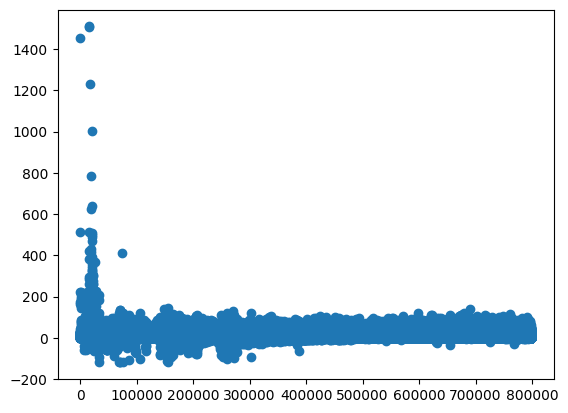

In [17]:

fig,ax=plt.subplots()
#crea un objeto graficable del tipo fig
ax.scatter(c[:len(d)],d)
#crea una grafica de sipersion y toma como eje x al arreglo "c", eje y a "b"
